### PLINK: 

##### extract random SNPs:
`plink --noweb --bfile /oasis/tscc/scratch/biom200/cmm262/Module_Schork_Libiger/hapmap3 --thin 0.00001 --recode --out hapmap3_thin`

###### inspect files

###### extract SNPs on chr 21 and recode  

`plink --noweb --bfile /oasis/tscc/scratch/biom200/cmm262/Module_Schork_Libiger/hapmap3 --chr 21 --recode --out hapmap3_chr21`

###### prune for LD  
  
`plink --noweb --file hapmap3_thin --indep-pairwise 50 5 0.1`  
`plink --noweb --file hapmap3_thin --extract plink.prune.in --make-bed --out hapmap3_thin_pruned`  
`plink --noweb --file hapmap3_chr21 --indep-pairwise 50 5 0.1`  
`plink --noweb --file hapmap3_chr21 --extract plink.prune.in --make-bed --out hapmap3_chr21_pruned`  
`plink --noweb --bfile /oasis/tscc/scratch/biom200/cmm262/Module_Schork_Libiger/hapmap3 --indep-pairwise 50 5 0.1`  
`plink --noweb --bfile /oasis/tscc/scratch/biom200/cmm262/Module_Schork_Libiger/hapmap3 --extract plink.prune.in --make-bed --out hapmap3_pruned`  

###### why prune?

###### create IBS matrix

`plink --noweb --bfile hapmap3_thin_pruned --cluster --distance-matrix --out hapmap3_thin_pruned`  
`plink --noweb --bfile hapmap3_chr21_pruned --cluster --distance-matrix --out hapmap3_chr21_pruned`  
`plink --noweb --bfile hapmap3_pruned --cluster --distance-matrix --out hapmap3_pruned`  


In [1]:
#start R
thin=read.table("hapmap3_thin_pruned.mdist",F)
chr21=read.table("hapmap3_chr21_pruned.mdist",F)
all=read.table("hapmap3_pruned.mdist",F)

In [2]:
#multidimensional scaling
thin_coord=cmdscale(thin,2)
chr21_coord=cmdscale(chr21,2)
all_coord=cmdscale(all,2)

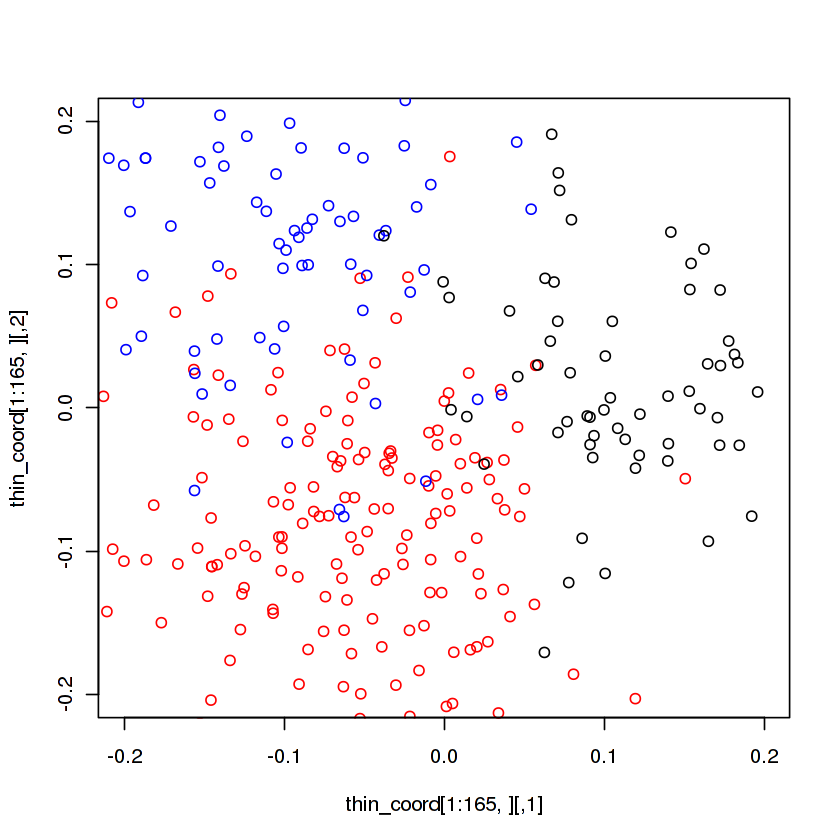

In [3]:
#plot
plot(thin_coord[1:165,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),col="red")
points(thin_coord[166:250,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),col="blue",type="p")
points(thin_coord[251:317,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),type="p")

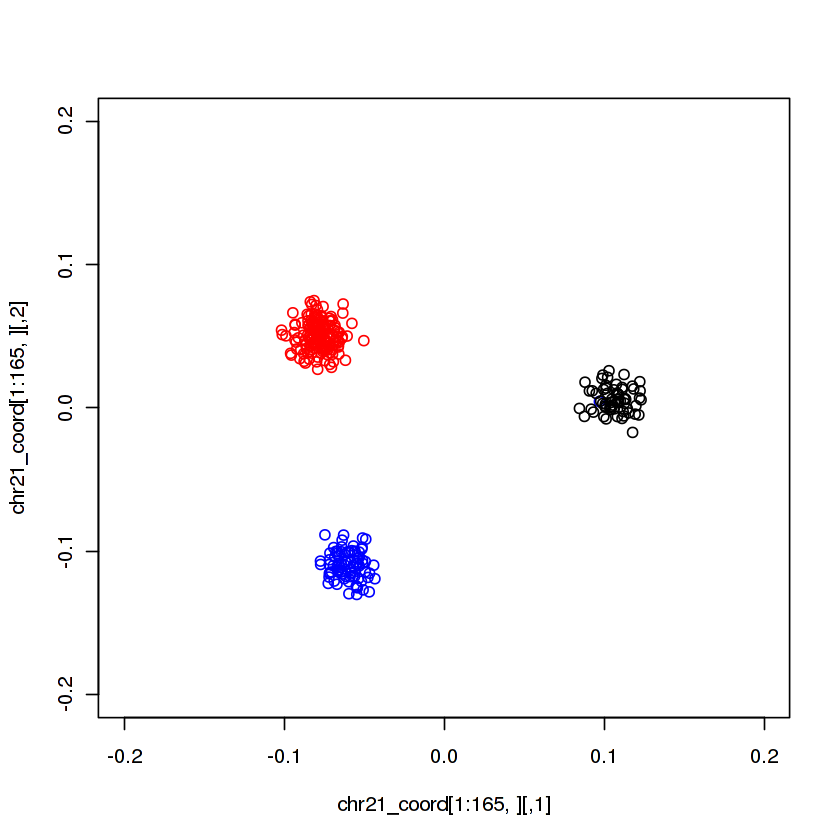

In [4]:
plot(chr21_coord[1:165,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),col="red")
points(chr21_coord[166:250,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),col="blue",type="p")
points(chr21_coord[251:317,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),type="p")

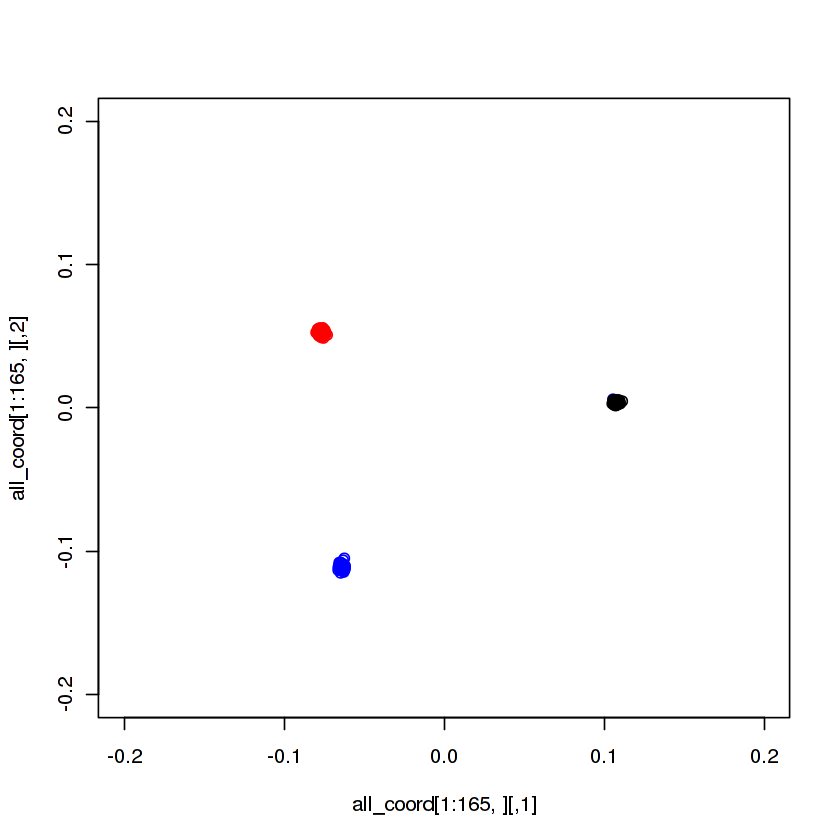

In [5]:
plot(all_coord[1:165,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),col="red")
points(all_coord[166:250,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),col="blue",type="p")
points(all_coord[251:317,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),type="p")

In [12]:
# check what library enviroment you're working in:
.libPaths()

# if this is not your own library R will not be able to load the require packages you installed for this session.
# in order to still load the packages we need we have to add our own library path:
# To do so run the following and add your own library:
#.libPaths(c(.libPaths(), "/home/ucsd-train36/anaconda2/lib/R/library"))

[1] "/projects/ps-yeolab/software/eclipconda/envs/seurat-2.2/lib/R/library"
[2] "/home/ucsd-train36/anaconda2/lib/R/library"

In [13]:
#what if we didn't use SNPs but rarer variation?
#only higher frequency?
#what if we used coding SNPs?
#what about other types of variation?
#what if the population were Italians, French and English? Would we need more or fewer markers?
#what about Mexicans and African Americans? would they cluster? 
#why is this a problem in mapping? What are the solutions?

#grouping as a predictor:
pred=cbind(c(rep(1,165),rep(0,(416-165))), c(rep(0,165),rep(1,84),rep(0,(416-249))) ,c(rep(0,249),rep(1,(416-249))))

require(vegan, lib.loc ='/home/ucsd-train36/anaconda2/lib/R/library')
adonis(thin~pred)
adonis(chr21~pred)
adonis(all~pred)

#random grouping
p=rep(c(0,1),208)
adonis(all~p)

#why do we get lots more variation explained?


Call:
adonis(formula = thin ~ pred) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
pred        2    6.6069  3.3034  87.056 0.29656  0.001 ***
Residuals 413   15.6718  0.0379         0.70344           
Total     415   22.2787                 1.00000           
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Call:
adonis(formula = chr21 ~ pred) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
pred        2    4.6774  2.3387  53.643 0.20621  0.001 ***
Residuals 413   18.0058  0.0436         0.79379           
Total     415   22.6832                 1.00000           
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Call:
adonis(formula = all ~ pred) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model     R2 Pr(>F)    
pred        2    4.7444  2.3722  55.424 0.2116  0.001 ***
Residuals 413   17.6769  0.0428         0.7884           
Total     415   22.4213                 1.0000           
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Call:
adonis(formula = all ~ p) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)
p           1    0.0424 0.042418 0.78471 0.00189  0.952
Residuals 414   22.3789 0.054055         0.99811       
Total     415   22.4213                  1.00000       

### LEPTOSPIROSIS:

###### introduce data

###### clean data:
`plink --noweb --bfile /oasis/tscc/scratch/biom200/cmm262/Module_Schork_Libiger/lepto_unrel --maf 0.05 --geno 0.1 --make-bed --out lepto_clean`  

###### inspect data

###### prune:
`plink --bfile lepto_clean --indep-pairwise 50 5 0.2 --noweb`  
`plink --bfile lepto_clean --extract plink.prune.in --make-bed --out lepto_pruned --noweb`  

###### run unsupervised admixture with 2,3,4,5 clusters
`admixture lepto_pruned.bed 2`  
`admixture lepto_pruned.bed 3`  
`admixture lepto_pruned.bed 4`  

###### crossvalidation to select best K in bash:
`for K in 1 2 3; do admixture --cv lepto_pruned.bed $K | tee log${K}.out; done`

CV error (K=1): 0.56962

CV error (K=2): 0.56176

CV error (K=3): 0.56551


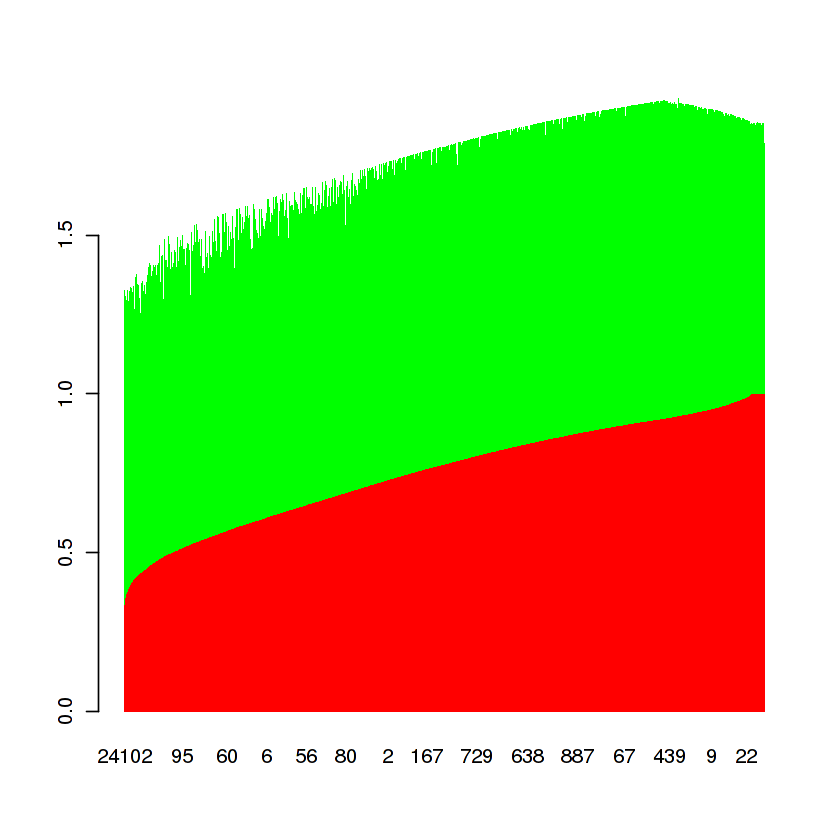

In [14]:
a=read.table("lepto_pruned.2.P",F)
barplot(t(a[order(a[,1]),]),col=c("red","green"),border=NA)

In [ ]:
###### run association  
`plink --bfile lepto_clean --noweb --assoc --adjust --qq-plot --out lepto_clean`  

##### why do we need to remove unrelateds?

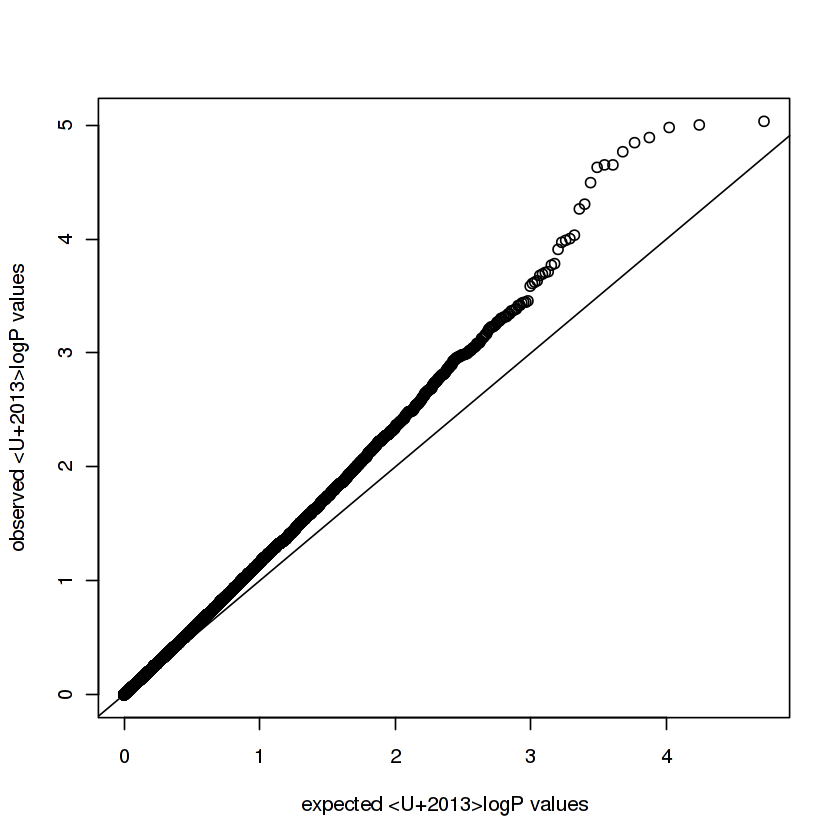

In [17]:
#make qq plot in R:
data <- read.table("lepto_clean.assoc.adjusted",T)
#png("qqplot_mds.png")
plot(-log10(data$QQ),-log10(data$UNADJ),xlab="expected –logP values",ylab="observed –logP values")
abline(a = 0, b = 1)
#dev.off()

###### inspect plot
###### explain inflation, ask for possible causes

#run a linear model with MDS as covariates:

`plink --bfile lepto_pruned --noweb --mds-plot 10 --out cov`  

`plink --bfile lepto_clean --noweb --linear --covar cov.mds --covar-number 1,2,4-13 --adjust --qq-plot --out lepto_clean_mds`  


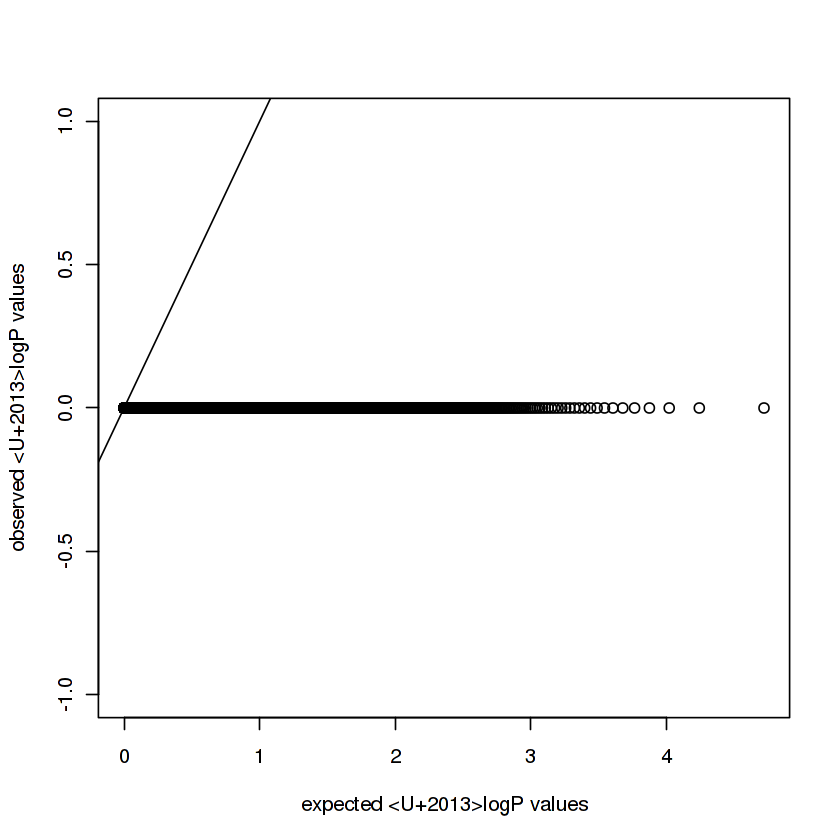

In [18]:
#make qq plot in R:
data <- read.table("lepto_clean_mds.assoc.logistic.adjusted",T)
#png("qqplot_mds.png")
plot(-log10(data$QQ),-log10(data$UNADJ),xlab="expected –logP values",ylab="observed –logP values")
abline(a = 0, b = 1)
#dev.off()